In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\HP15S\Downloads\Banking.xlsx - Clients - Banking.csv")

In [3]:
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,5/6/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,12/10/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,1/25/2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,3/28/2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,7/20/2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [4]:
df.shape

(3000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [6]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']


In [7]:
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

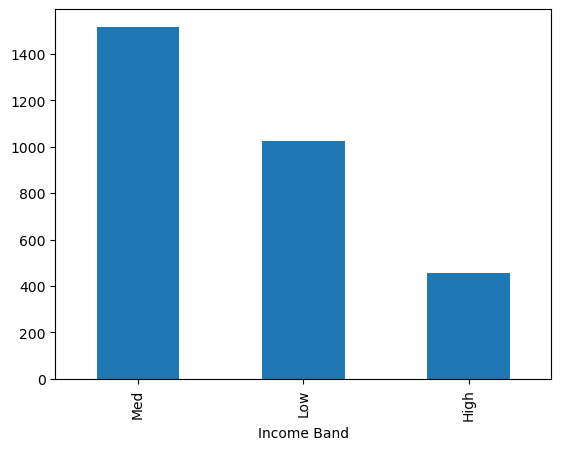

In [8]:
df['Income Band'].value_counts().plot(kind='bar')

In [9]:
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards",
                       "Nationality", "Occupation", "Fee Structure",
                       "Loyalty Classification"]].columns

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

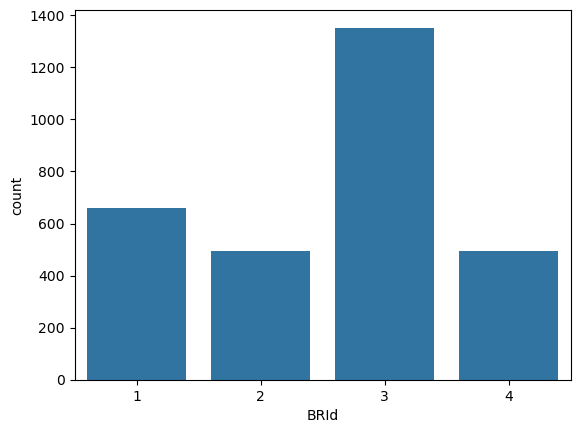

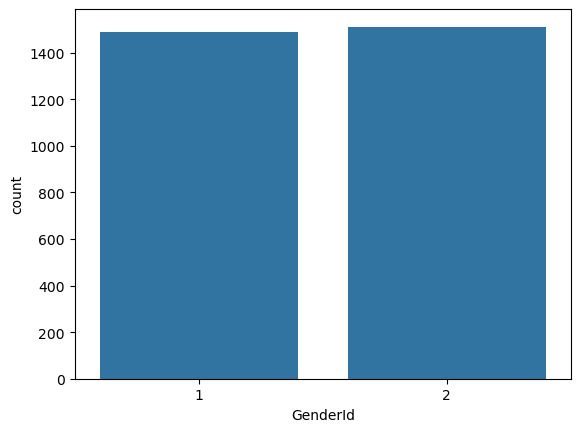

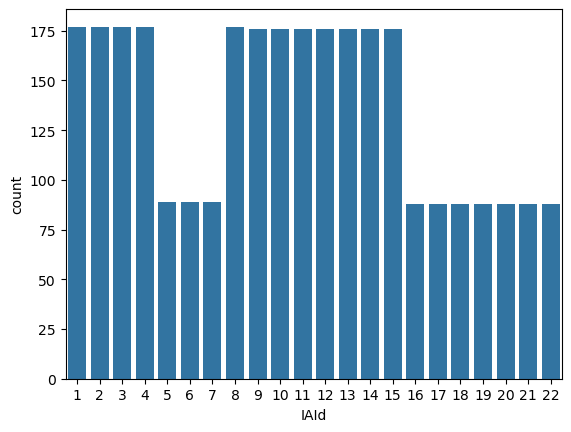

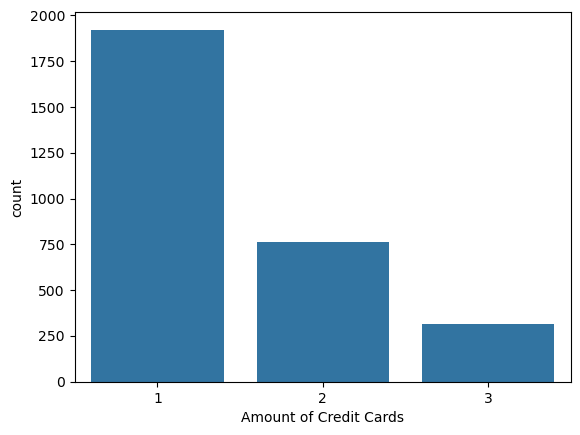

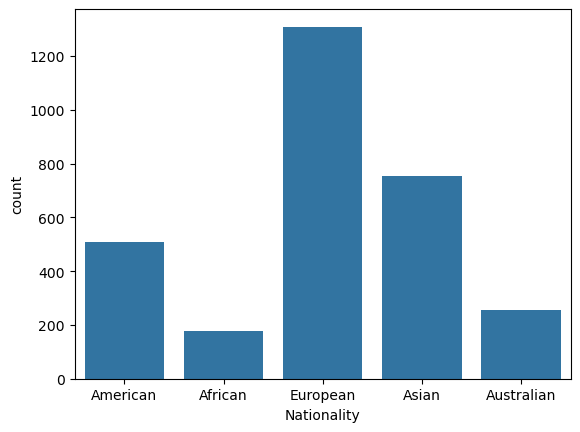

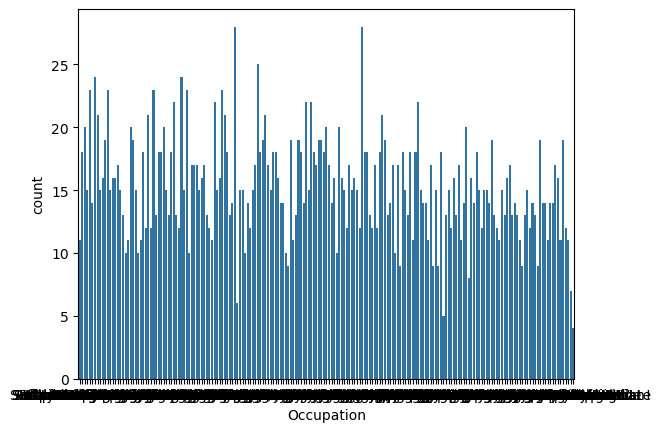

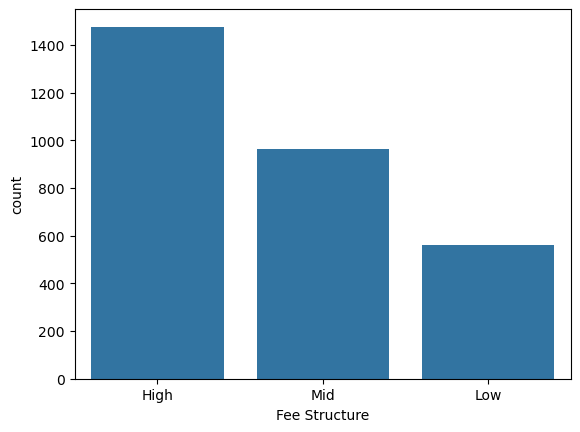

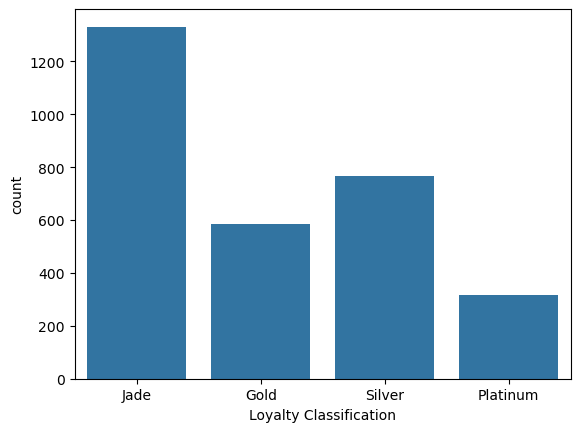

In [10]:
columns = ["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification"]

for predictor in columns:
    plt.figure()
    sns.countplot(data=df, x=predictor)


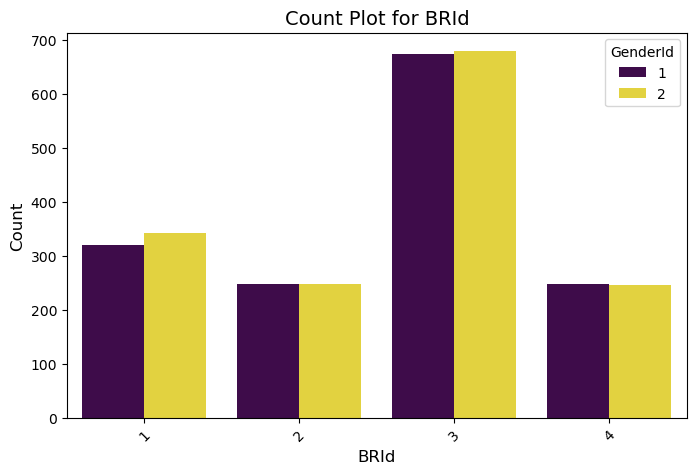

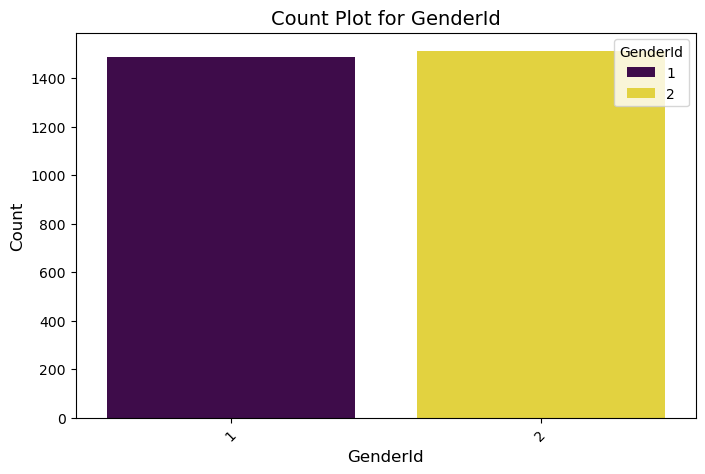

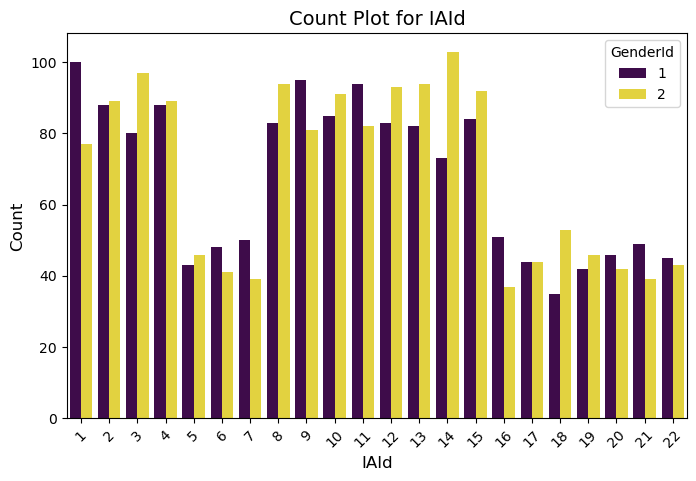

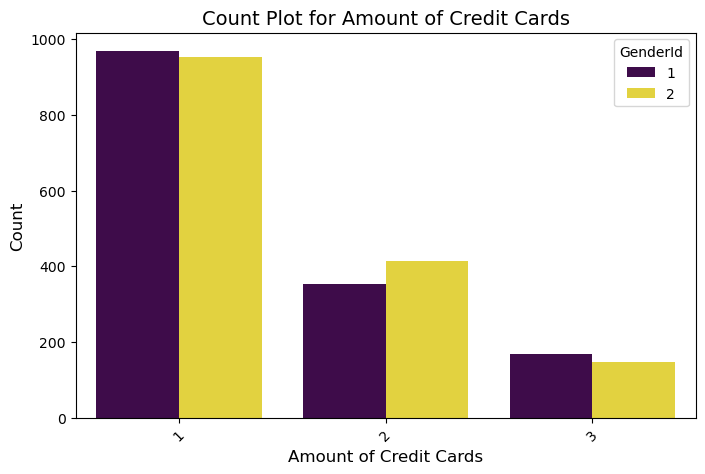

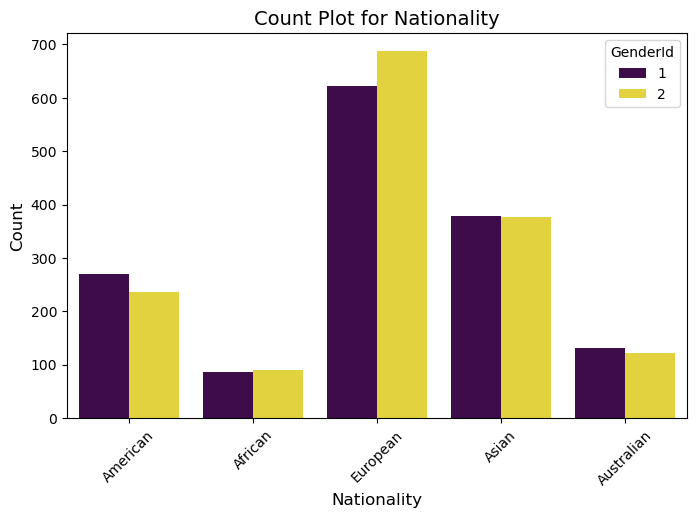

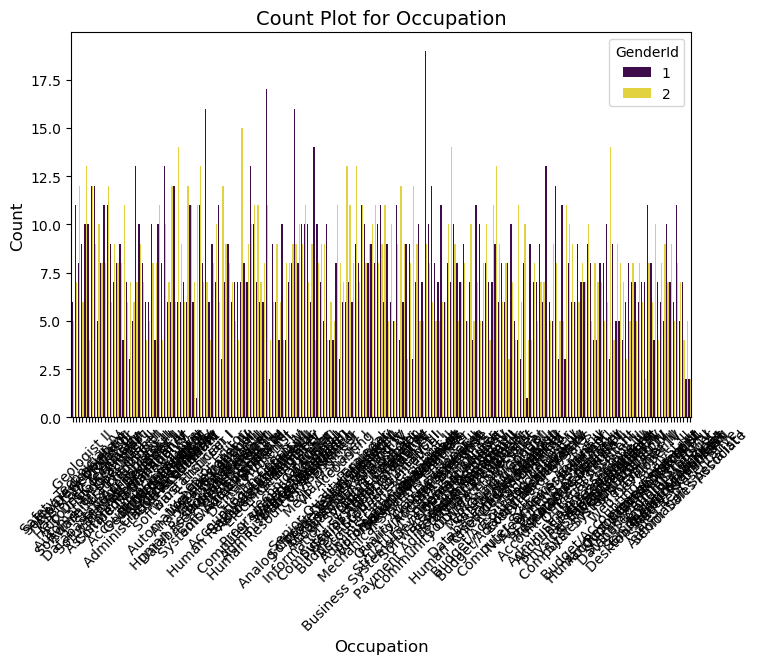

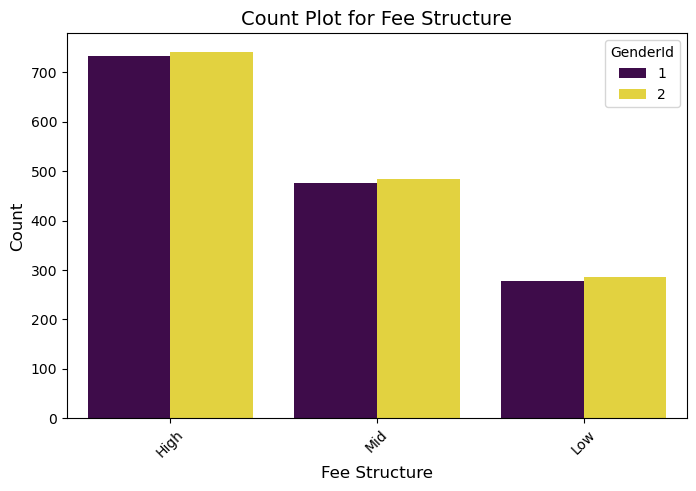

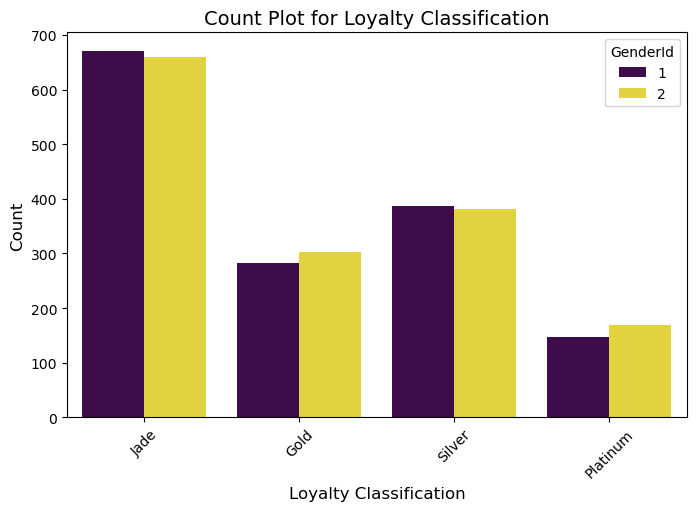

In [11]:
columns = ["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification"]

for predictor in columns:
    plt.figure(figsize=(8, 5)) 
    sns.countplot(data=df, x=predictor, hue = 'GenderId', palette="viridis")  
    plt.title(f'Count Plot for {predictor}', fontsize=14)  
    plt.xlabel(predictor, fontsize=12)  
    plt.ylabel('Count', fontsize=12)  
    plt.xticks(rotation=45)  
    plt.show() 

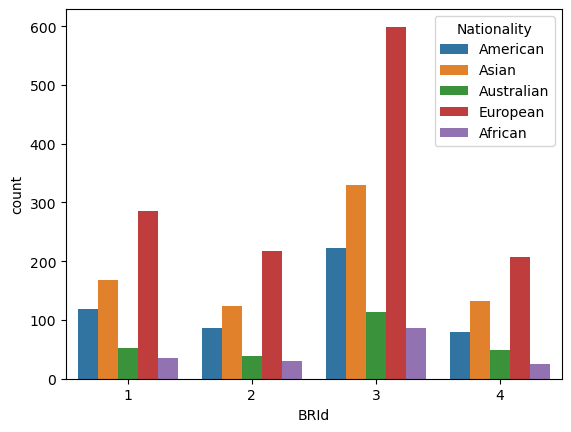

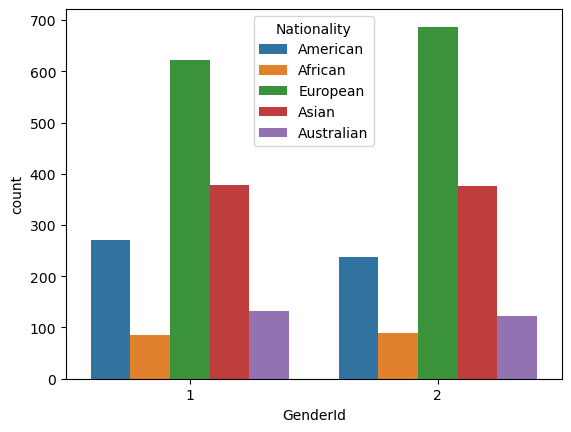

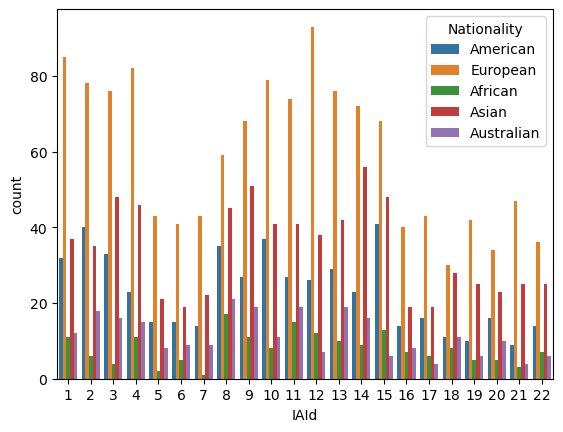

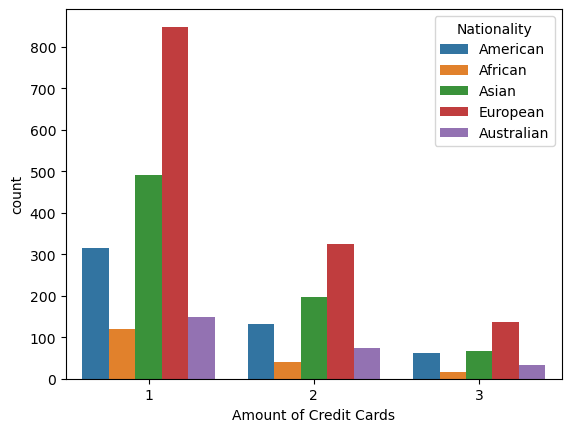

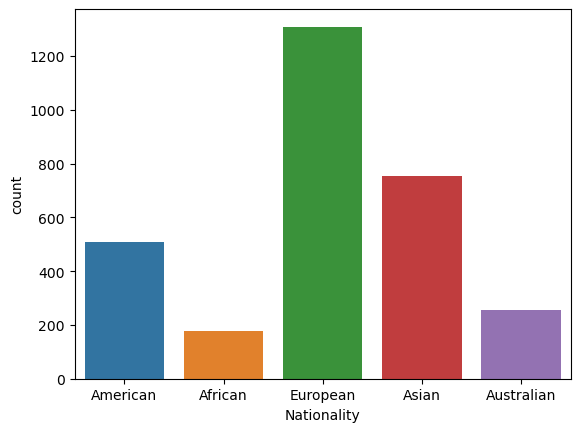

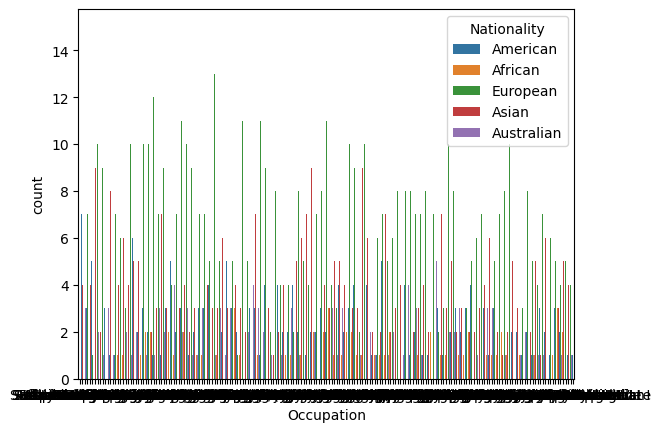

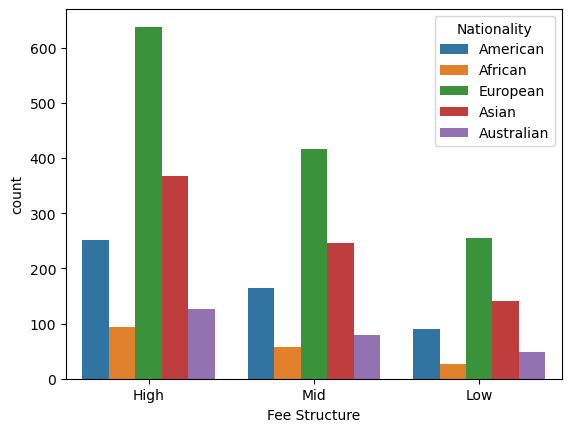

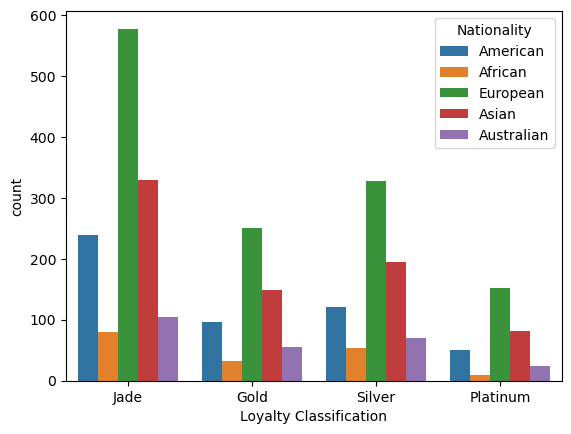

In [12]:
for predictor in columns:
    plt.figure()
    sns.countplot(data = df, x = predictor, hue ='Nationality')

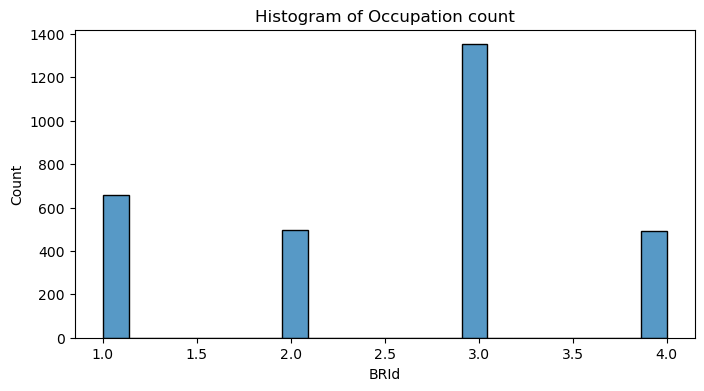

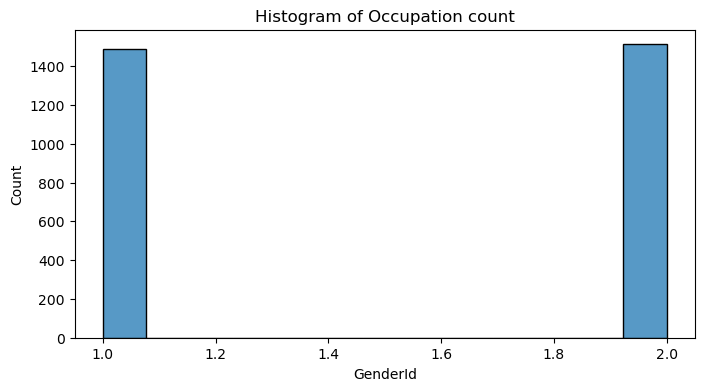

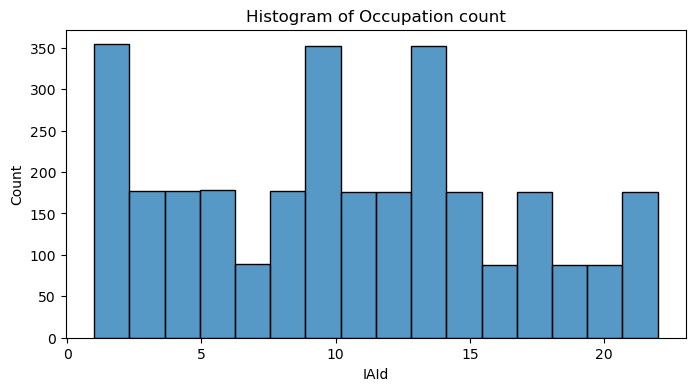

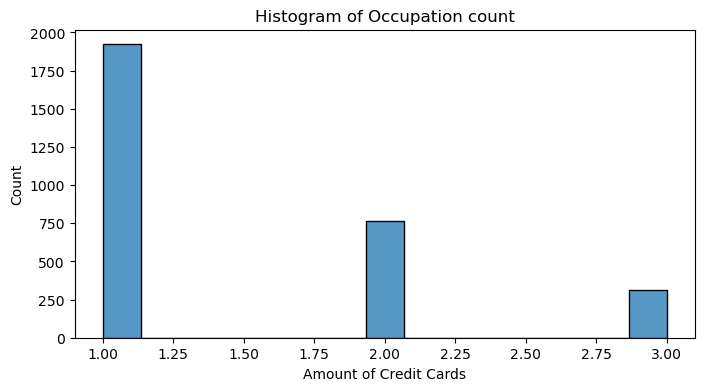

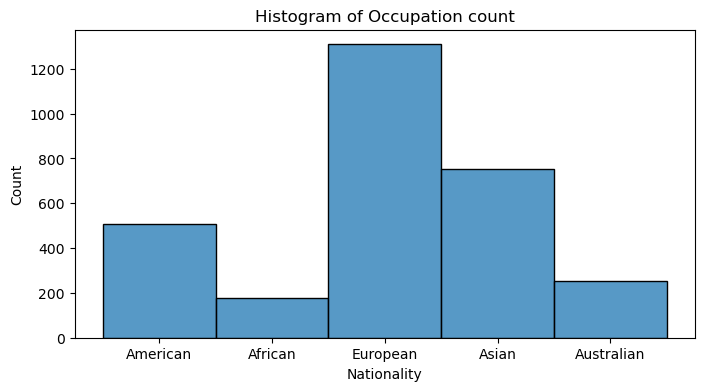

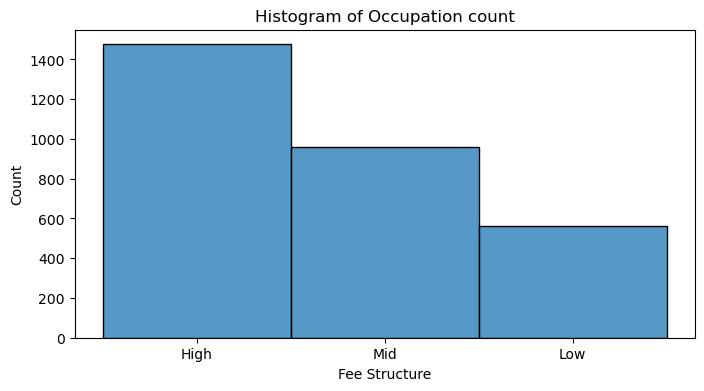

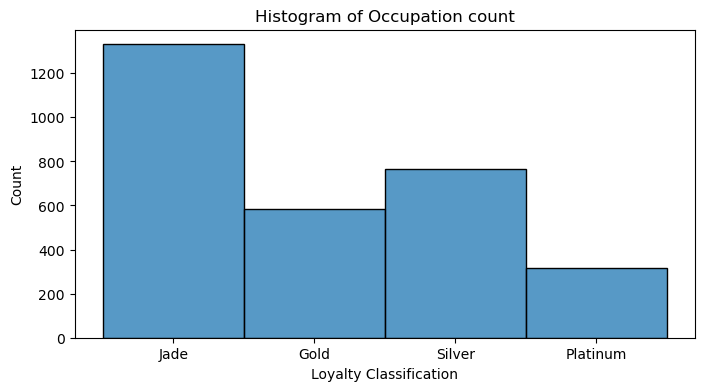

In [13]:
for col in categorical_cols:
    if col == 'Occupation':
        continue
    plt.figure(figsize = (8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation count')
    plt.xlabel(col)
    plt.ylabel('Count')    plt.show()

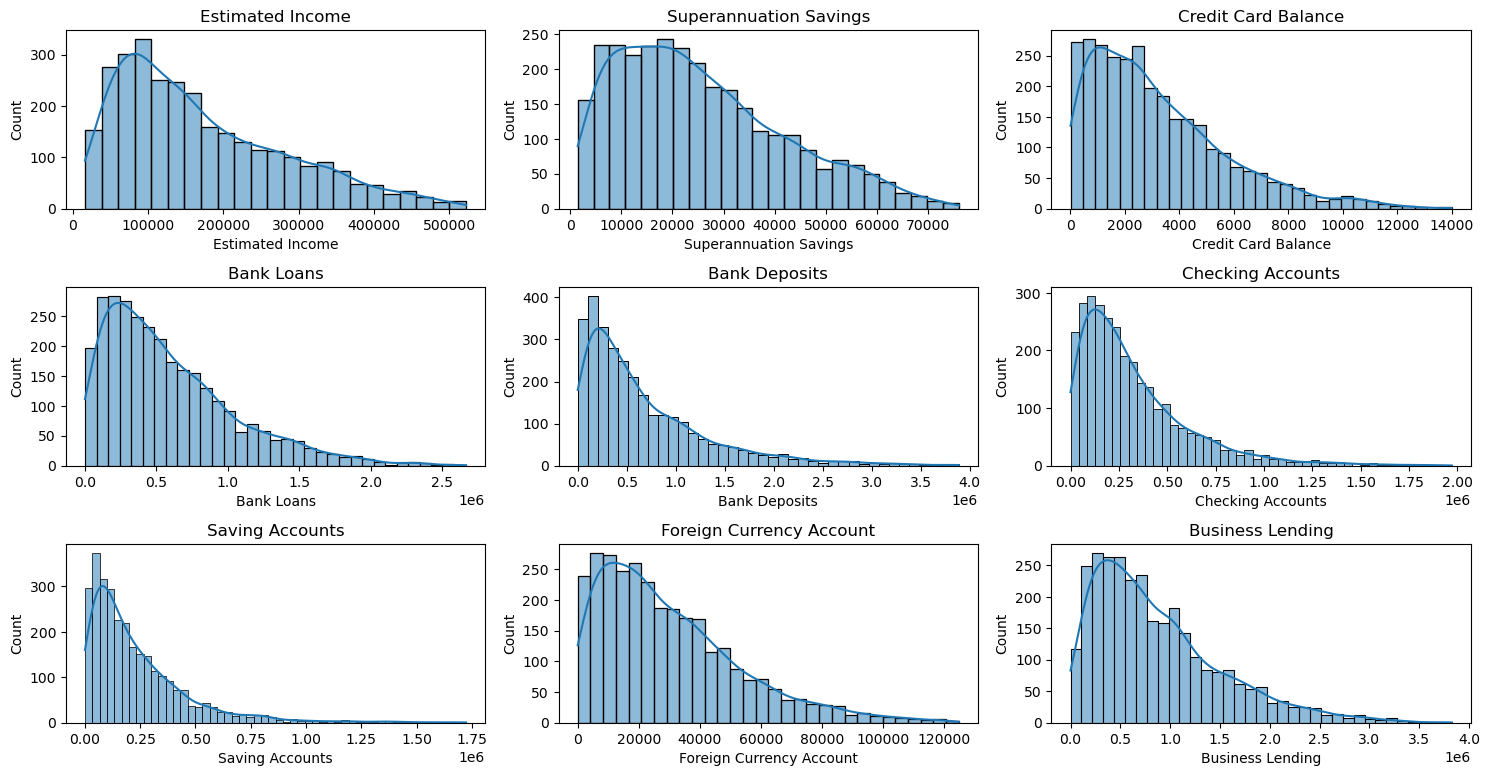

In [14]:
#Numerical Analysis
numerical_cols = ['Estimated Income', 'Superannuation Savings','Credit Card Balance', 'Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account', 'Business Lending']
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


Heat Maps

<Axes: >

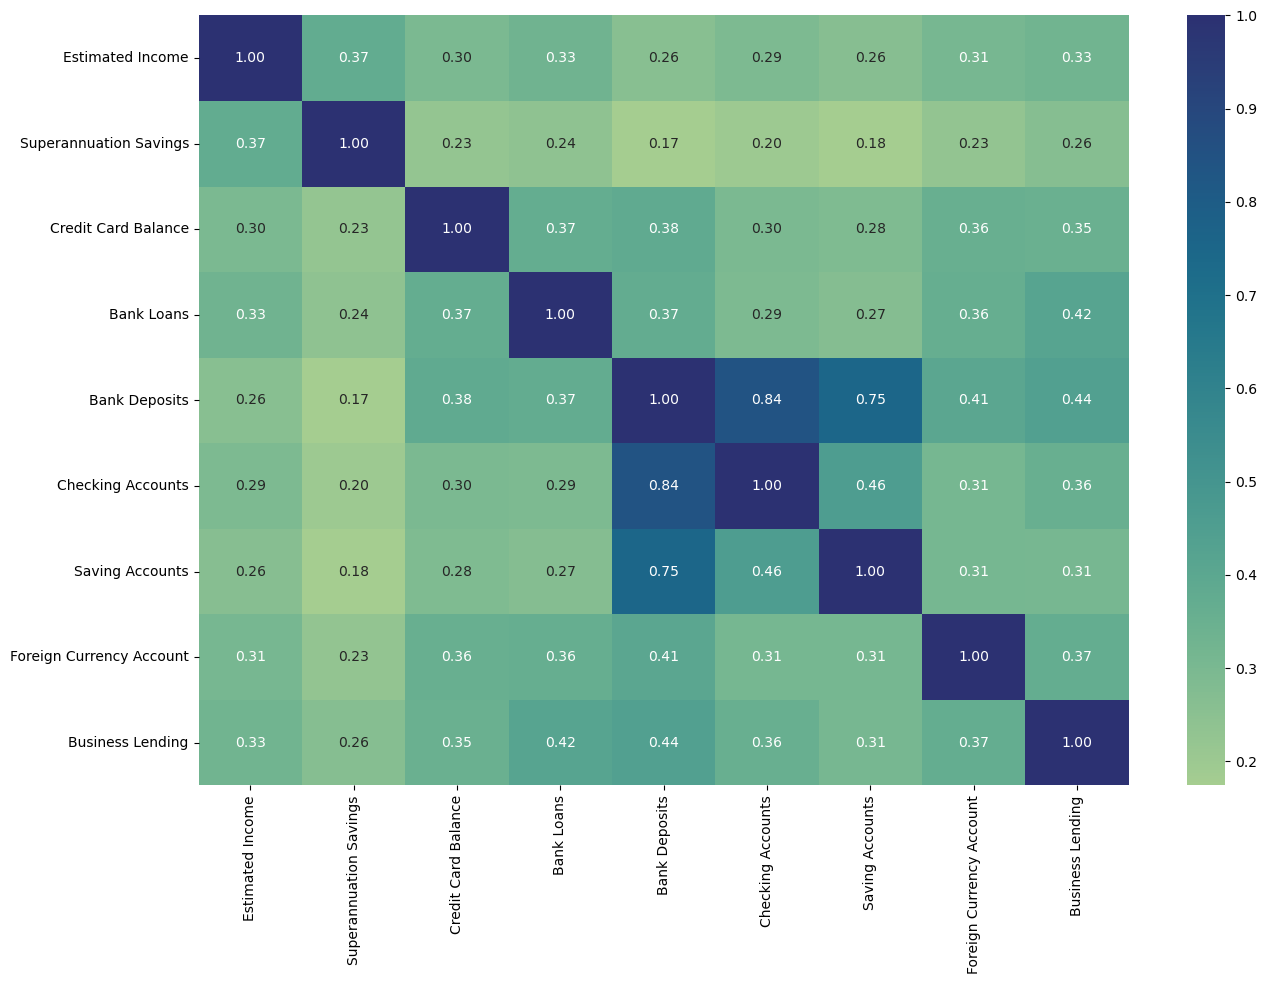

In [44]:
numerical_cols = ['Estimated Income', 'Superannuation Savings','Credit Card Balance', 'Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account', 'Business Lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,cmap = 'crest',annot = True,  fmt ="0.2f")
